In [48]:
# 주어진 데이터가 얼마나 혼합되어 있는지 , 불순도가 낮을수록 해당 노드의 순도가 높다
# C 클래스 개수
# pi 클래스 i에 속할 확률
# 0 에 가까울 수록 한가지 클래스에 속할 확률이 높고. 0.5는 골고루
# 클래스 1의 비율 p1 : 6/10 = 0.6
# 클래스 2의 비율 p2 : 4/10 = 0.4
# 결정트리는 각 분기에서 지니 계수를 계산하고 이 값을 가장 크게 감소시키는 방향으로 데이터를 분할할

지니계수

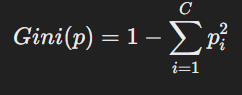

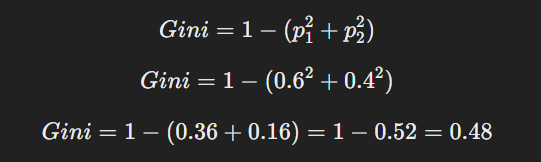

In [49]:
# 데이터의 불확실성을 줄이는 정도를 측정
# 분할전후의 엔트로피차이 계산해서 정보의 순도(불확실성)가 얼마나 개선되었는지를 나타냄
# 엔트로피가 클수록 불확실성이 높다
# 0에 가까우면 한쪽 클래스에 치중.. 1에 가까우면 고르게 분포

# 정보이득 : 노드를 분할한다음 엔트로피가 얼마나 감소했는지 계산

정보이득

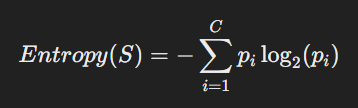

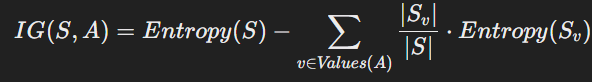

In [50]:
# 클래스1 : 9개  p1 = 9/14  0.64
# 클래스2 : 5개  p2 = 5/14 = 0.36
# emtropy(s) = -0.64log2(0.64) + 0.36log2(0.36) = 0.93

# 데이터를 특성 A로 분할한다고 가정  
# 첫번째 그룹 : 클래스 1 4개 , 클래스 2 3개
# 두번째 그룹 : 클래스 1 5개 , 클래스 2 2개

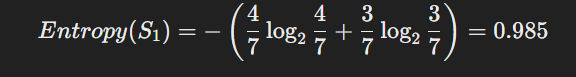

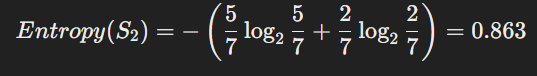

분할후 엔트로피의 가중치의 합


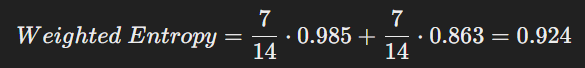

정보이득 : 분할전 엔트로피에서 분할후 가중치 엔트로피를 뺀 값

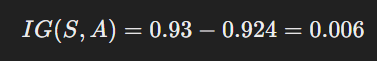

In [51]:
# 속성 A로 데이터를 분할했을때 정보이득 0.006  정보이득이 클수록 해당 속성으로 데이터를 분할했을때 얻는 이득이 크가
# 결정트리는 정보이득이 최대가 되는 방향

In [52]:
# 분류... 로지스틱회귀, 최근접 이웃, svm.SVC, 결정트리
# 데이터 - EDA(탐색적 데이터 분석) - 위의 모델중에 적합한 모델선정 - 평가 - 우수한 모델을 채택

Car Evaluation

In [53]:
import pandas as pd
df = pd.read_csv('C:/pandas/Car Evaluation/car_evaluation.csv')
df.columns = ['buying','maint','doors','persons','lug_boot','safty','class']
df.head()

,buying,maint,doors,persons,lug_boot,safty,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safty     1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [55]:
for col in df.columns:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safty
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [56]:
pd.set_option('future.no_silent_downcasting', True)
df['buying'] = df['buying'].str.strip().replace({
    'vhigh':3,'high':2,'med':1,'low':0
})
df['maint'] = df['maint'].str.strip().replace({
    'vhigh':3,'high':2,'med':1,'low':0
})
df['doors'] = df['doors'].str.strip().replace({
    '5more':3,'4':2,'3':1,'2':0
})
df['persons'] = df['persons'].str.strip().replace({
    'more':2,'4':1,'2':0
})
df['lug_boot'] = df['lug_boot'].str.strip().replace({
    'big':2,'med':1,'small':0
})
df['safty'] = df['safty'].str.strip().replace({
    'high':2,'med':1,'low':0
})

In [57]:
from sklearn.preprocessing import LabelEncoder
df['class'] = LabelEncoder().fit_transform(df['class'])

In [58]:
df['class'].value_counts()   # 클래스 불균형

class
2    1209
0     384
1      69
3      65
Name: count, dtype: int64

데이터 분할

In [59]:
from sklearn.model_selection import train_test_split
x = df.drop('class',axis=1)
y = df['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state=42)

결정트리

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

평가


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test ,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        96
           1       0.89      1.00      0.94        17
           2       1.00      0.99      1.00       303
           3       1.00      0.94      0.97        16

    accuracy                           0.99       432
   macro avg       0.97      0.97      0.97       432
weighted avg       0.99      0.99      0.99       432



데이터표준화

In [64]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,stratify=y, random_state=42)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [113]:
model_dict = {
    'dt' : DecisionTreeClassifier(),
    'knn' : KNeighborsClassifier(),
    'logistic' : LogisticRegression(),
    'svm' : SVC()
}
result = []
for name,model in model_dict.items():
    model.fit(x_train,y_train)    
    result.append(pd.DataFrame(classification_report(y_test ,model.predict(x_test),output_dict=True))    )   

In [115]:
result_df = pd.concat([result[0].loc[['f1-score']],result[1].loc[['f1-score']]
                       ,result[2].loc[['f1-score']], result[3].loc[['f1-score']] 
                       ])
result_df.index = ['dt','knn','logistic','svm']
result_df

,0,1,2,3,accuracy,macro avg,weighted avg
dt,0.973822,0.944444,0.995041,1.000000,0.988426,0.978327,0.988518
knn,0.958763,0.909091,0.991763,0.933333,0.979167,0.948237,0.979012
logistic,0.591716,0.606061,0.908228,0.666667,0.826389,0.693168,0.817054
svm,0.948980,0.937500,0.988430,0.967742,0.976852,0.960663,0.976893
